In [1]:
%matplotlib inline
import urllib
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
url = 'http://atlstats.web.cern.ch/atlstats/zeroaccess/2016-07-25/list-2016-07-25'


In [2]:
creation_dates = []
filehandle = urllib.urlopen(url)
datatypes = {}
i = 0
for line in filehandle:
    line = line.rstrip('\n')
    i += 1
    if line.find('DAOD') > -1:
        #print line.split()
        scope, name, size, created, nbreplicas = line.split('\t')
        created_at = time.gmtime(float(created))
        if '%s-%02d' % (created_at[0], created_at[1]) not in creation_dates:
            creation_dates.append('%s-%02d' % (created_at[0], created_at[1]))
        project, run, stream, prodstep, datatype, tag = name.split('.')
        if datatype not in datatypes:
            datatypes[datatype] = 0
        if size:
            datatypes[datatype] += int(size)
#print datatypes

<Container object of 117 artists>

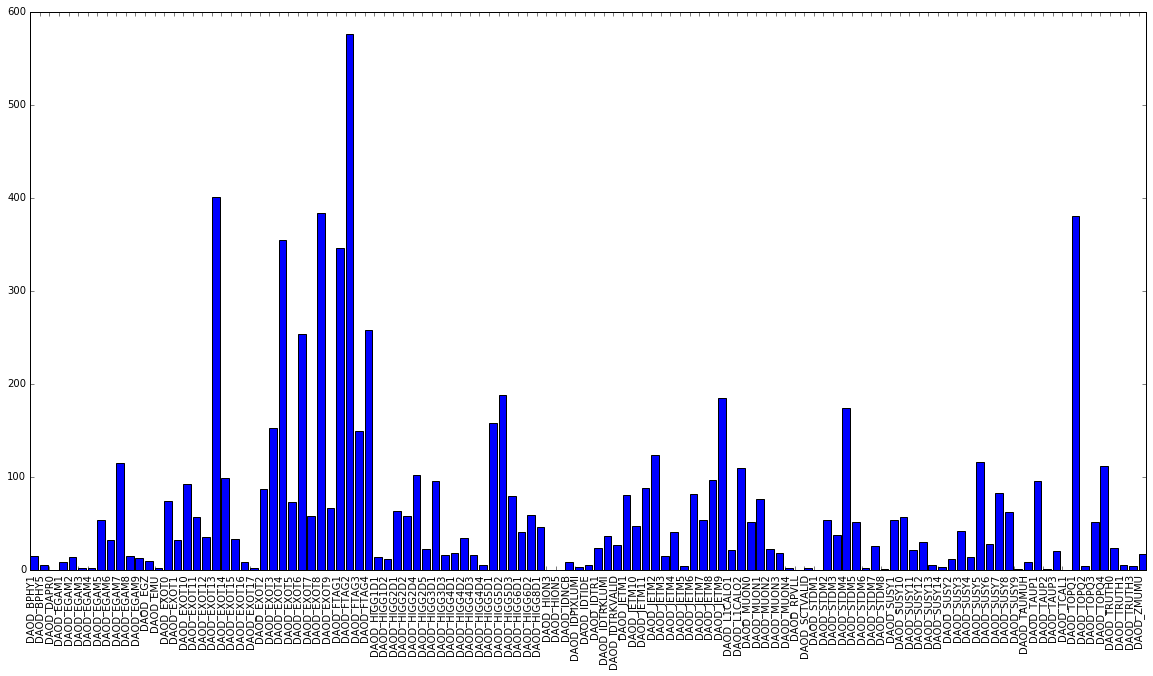

In [3]:
plt.figure(figsize=(20,10))
x_values = [_ for _ in range(len(datatypes))]
x_datatypes = datatypes.keys()
x_datatypes.sort()
y_datatypes = []
for key in x_datatypes:
    y_datatypes.append(datatypes[key]/1000.**4)
xaxis = plt.xticks(x_values, x_datatypes, rotation='vertical')
plt.bar(x_values, y_datatypes)

In [4]:
list_datatypes = datatypes.keys()
filehandle = urllib.urlopen(url)
time_datatypes = {}

for date in creation_dates:
    time_datatypes[date] = {}
    for dat in list_datatypes:
        time_datatypes[date][dat] = 0

x_datatypes = datatypes.keys()
x_datatypes.sort()
        
for line in filehandle:
    line = line.rstrip('\n')
    if line.find('DAOD') > -1:
        scope, name, size, created, nbreplicas = line.split('\t')
        project, run, stream, prodstep, datatype, tag = name.split('.')
        created_at = time.gmtime(float(created))
        if size:
            time_datatypes['%s-%02d' % (created_at[0], created_at[1])][datatype] += int(size)

#print time_datatypes

In [5]:
series = time_datatypes.keys()
series.sort()

['2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07']


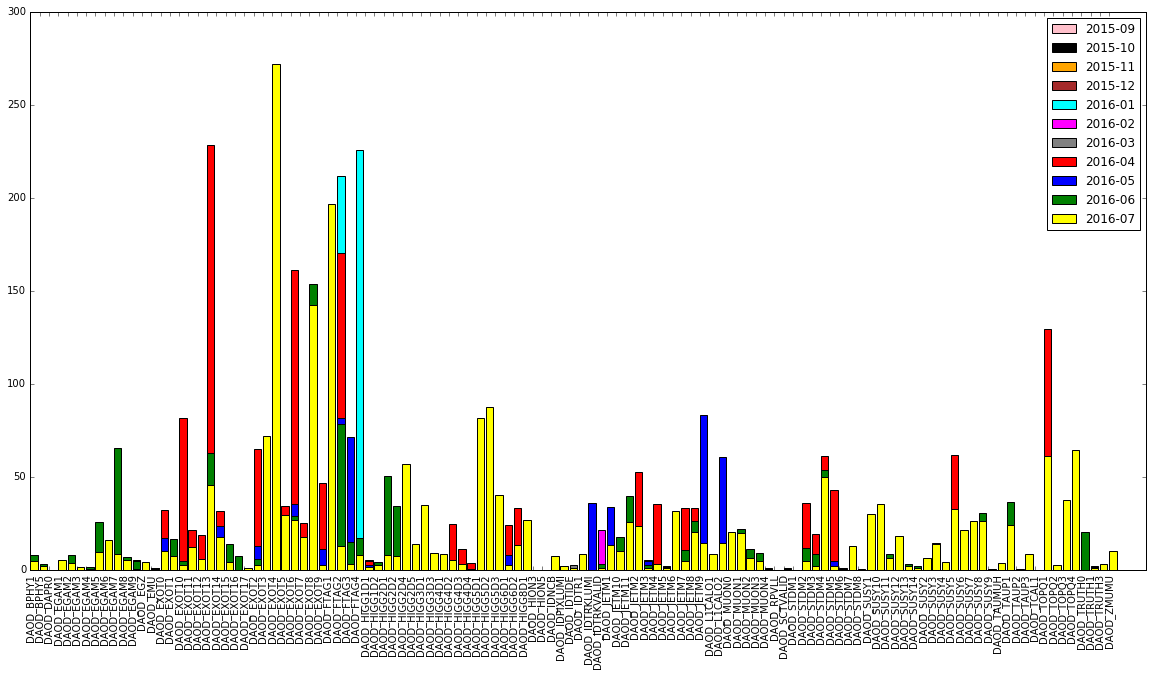

In [6]:
print series
plt.figure(figsize=(20,10))
colors = ['pink', 'black', 'orange', 'brown', 'cyan', 'magenta', 'grey', 'red', 'blue', 'green', 'yellow']
i = 0
ncolors = len(series)
for serie in series:
    datatypes = time_datatypes[serie]
    x_values = [_ for _ in range(len(datatypes))]
    y_datatypes = []
    color = cm.hot(i/float(ncolors), 1)
    for key in x_datatypes:
        y_datatypes.append(datatypes[key]/1000.**4)
    # print x_values, y_datatypes, color, serie
    plt.bar(x_values, y_datatypes, color=colors[i], label=serie)
    i += 1
plt.xticks(x_values, x_datatypes, rotation='vertical')
plt.legend()

In [7]:
plt.figure(figsize=(20,10))
y_values = []
for serie in series:
    sum_by_month = 0
    for dat in time_datatypes[serie]:
        sum_by_month += time_datatypes[serie][dat]
    y_values.append(sum_by_month/1000.**4)
    print serie, sum_by_month


2015-09 1099654186089
2015-10 967585556971
2015-11 21190592588205
2015-12 35447814805000
2016-01 578682629627800
2016-02 213607547294737
2016-03 139199548523281
2016-04 2272748800440391
2016-05 919909032466146
2016-06 1412384092705078
2016-07 2111593308343167


<Container object of 11 artists>

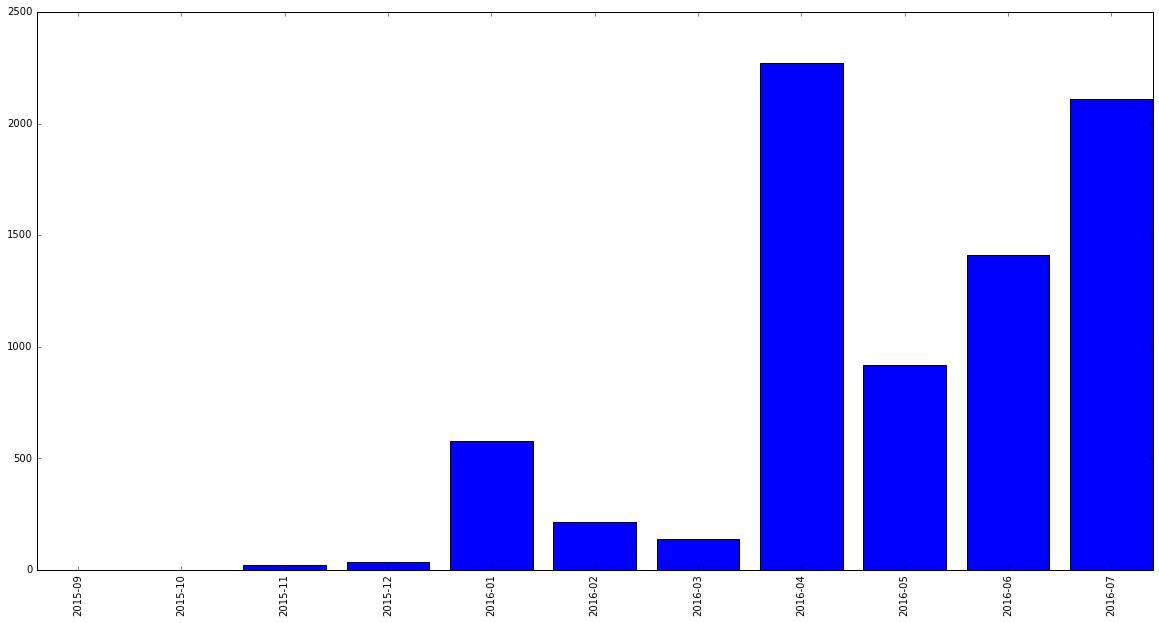

In [19]:
plt.figure(figsize=(20,10))
x_values = [_ for _ in range(len(series))]
plt.xticks(x_values, series, rotation='vertical')
plt.bar(x_values, y_values, align="center")

In [11]:
#print x_datatypes
x_datatypes_dict = {}
for dat in x_datatypes:
    x_datatypes_dict[dat] = []
for serie in series:
    for dat in time_datatypes[serie]:
        x_datatypes_dict[dat].append(time_datatypes[serie][dat]/1000.**4)
#print x_datatypes_dict

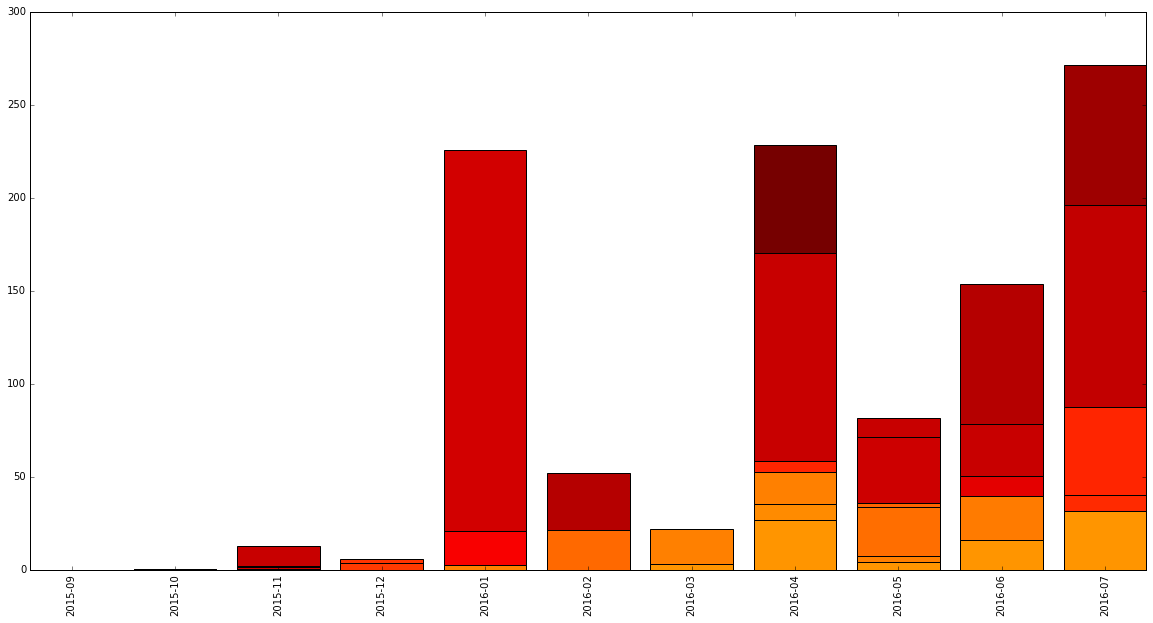

In [32]:
plt.figure(figsize=(20,10))
x_values = [_ for _ in range(len(series))]
i = 0
x_datatypes_key = x_datatypes_dict.keys()
x_datatypes_key.sort()
ncolors = len(x_datatypes_key)
plt.xticks(x_values, series, rotation='vertical')
for dat in x_datatypes_key:
    color = cm.hot(i/float(ncolors), 1)
    i += 1
    plt.bar(x_values, x_datatypes_dict[dat], align="center", color=color, label=dat)
    #print dat, x_datatypes_dict[dat][-1]
    if len(x_datatypes_dict[dat]) != 11: print x_datatypes_dict[dat]
#plt.xticks(x_values, series, rotation='vertical')
#plt.legend()